**DMV Practical No.-3**                                                           

                                          

Data Cleaning and Preparation
Problem Statement: Analyzing Customer Churn in a Telecommunications Company
Dataset: "Telecom_Customer_Churn.csv"
Description: The dataset contains information about customers of a telecommunications
company and whether they have churned (i.e., discontinued their services). The dataset
includes various attributes of the customers, such as their demographics, usage patterns, and
account information. The goal is to perform data cleaning and preparation to gain insights
into the factors that contribute to customer churn.
Tasks to Perform:
1. Import the "Telecom_Customer_Churn.csv" dataset.
2. Explore the dataset to understand its structure and content.
3. Handle missing values in the dataset, deciding on an appropriate strategy.
4. Remove any duplicate records from the dataset.
5. Check for inconsistent data, such as inconsistent formatting or spelling variations,
and standardize it.
6. Convert columns to the correct data types as needed.
7. Identify and handle outliers in the data.
8. Perform feature engineering, creating new features that may be relevant to
predicting customer churn.
9. Normalize or scale the data if necessary.
10. Split the dataset into training and testing sets for further analysis.
11. Export the cleaned dataset for future analysis or modeling.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv(r"telecom_customer_churn (1).csv")
df

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,...,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,NaN,NaN
7039,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,...,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,...,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined,NaN,NaN
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,...,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [4]:
df.isnull().sum()#shows the number of null values for every column

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

In [5]:
#It seperates the numerical columns(having data type other than object) and categorical columns(having data type object)
num_cols = df.select_dtypes(include=[np.number]).columns
num_cols = df.select_dtypes(include=[np.number]).columns
obj_cols = df.select_dtypes(include=['object']).columns
#Filling empty categorical coumns value with mode and numerical columns with mean
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())
df[obj_cols] = df[obj_cols].fillna(df[obj_cols].mode().iloc[0])
#.iloc[0]
#This selects the first row of that mode DataFrame.
#We do this because:
#If there’s more than one mode (tie), .iloc[0] just takes the first one.
#If there’s only one mode, it just picks that.

In [6]:
df.isnull().sum()

Customer ID                          0
Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
City                                 0
Zip Code                             0
Latitude                             0
Longitude                            0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data           

In [7]:
df.shape

(7043, 38)

In [8]:
df=df.drop_duplicates()

In [9]:
df.shape

(7043, 38)

In [10]:
df['Married'].unique()#Printing unique values in Married column of dataset

array(['Yes', 'No'], dtype=object)

In [11]:
df['Married'].value_counts()#Printing the count of unique value in Married column 

Married
No     3641
Yes    3402
Name: count, dtype: int64

In [12]:
for col in df.select_dtypes(include='object').columns:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())
#Printed every categorical column unique values to check if there are any data inconsitiencies


Unique values in 'Customer ID':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Unique values in 'Gender':
['Female' 'Male']

Unique values in 'Married':
['Yes' 'No']

Unique values in 'City':
['Frazier Park' 'Glendale' 'Costa Mesa' ... 'Jacumba' 'Carpinteria'
 'Meadow Valley']

Unique values in 'Offer':
['Offer B' 'Offer E' 'Offer D' 'Offer A' 'Offer C']

Unique values in 'Phone Service':
['Yes' 'No']

Unique values in 'Multiple Lines':
['No' 'Yes']

Unique values in 'Internet Service':
['Yes' 'No']

Unique values in 'Internet Type':
['Cable' 'Fiber Optic' 'DSL']

Unique values in 'Online Security':
['No' 'Yes']

Unique values in 'Online Backup':
['Yes' 'No']

Unique values in 'Device Protection Plan':
['No' 'Yes']

Unique values in 'Premium Tech Support':
['Yes' 'No']

Unique values in 'Streaming TV':
['Yes' 'No']

Unique values in 'Streaming Movies':
['No' 'Yes']

Unique values in 'Streaming Music':
['No' 'Yes']

Unique values in 'Unlimited Dat

In [13]:
df['Zip Code'] = df['Zip Code'].astype(str)#Type conversion of Zip code column

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   object 
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

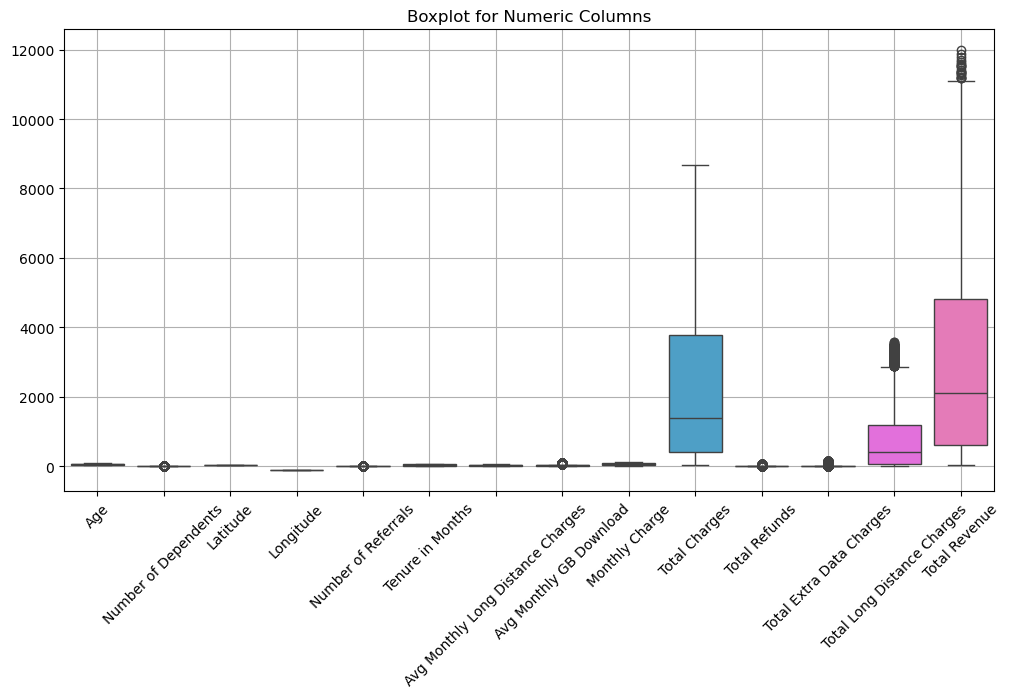

In [15]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols])
plt.title("Boxplot for Numeric Columns")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [16]:
outliers = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)#it calculates Q1 for that particular column
    Q3 = df[col].quantile(0.75)#it calculates Q3 for that particular column
    IQR = Q3 - Q1#It calculates the Inter Quartile Range(IQR)=Q3-Q1
    lower_limit = Q1 - 1.5 * IQR#Any value below this is considered as outliers
    upper_limit = Q3 + 1.5 * IQR#Any value above this is considered as outlier

    # Count outliers
    outlier_count = ((df[col] < lower_limit) | (df[col] > upper_limit)).sum()
    outliers[col] = outlier_count#counting number of outliers and storing in outliers list

# Display number of outliers per column
pd.DataFrame.from_dict(outliers, orient='index', columns=['Outlier Count'])
#orient='index because we want column names to be rows to show particular column outlier count
#if we do not use this then column names will be printed on top like how the Outlier column is placed we 
#dont want like that thats why we used this
#Printing outliers for each numeric column

,Outlier Count
Age,0
Number of Dependents,1627
Latitude,0
Longitude,0
Number of Referrals,676
Tenure in Months,0
Avg Monthly Long Distance Charges,0
Avg Monthly GB Download,1089
Monthly Charge,0
Total Charges,0


In [17]:
#Removing the outliers
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] > upper_limit, upper_limit,
                       np.where(df[col] < lower_limit, lower_limit, df[col]))#this does not remove the outliers
    #it makes the outliers values to fit in IQR Range 
    #np.where(df[col] < lower_limit, lower_limit, df[col]) this means If the value is below the lower limit → replace it with lower_limit,
    #otherwise → keep the original value.This ensures no values are smaller than lower_limit.

    #np.where(df[col] > upper_limit, upper_limit, <inner expression>).If the value is above the upper limit → replace it with upper_limit,
    #otherwise → use whatever the inner expression gives (either unchanged value or capped at lower limit).

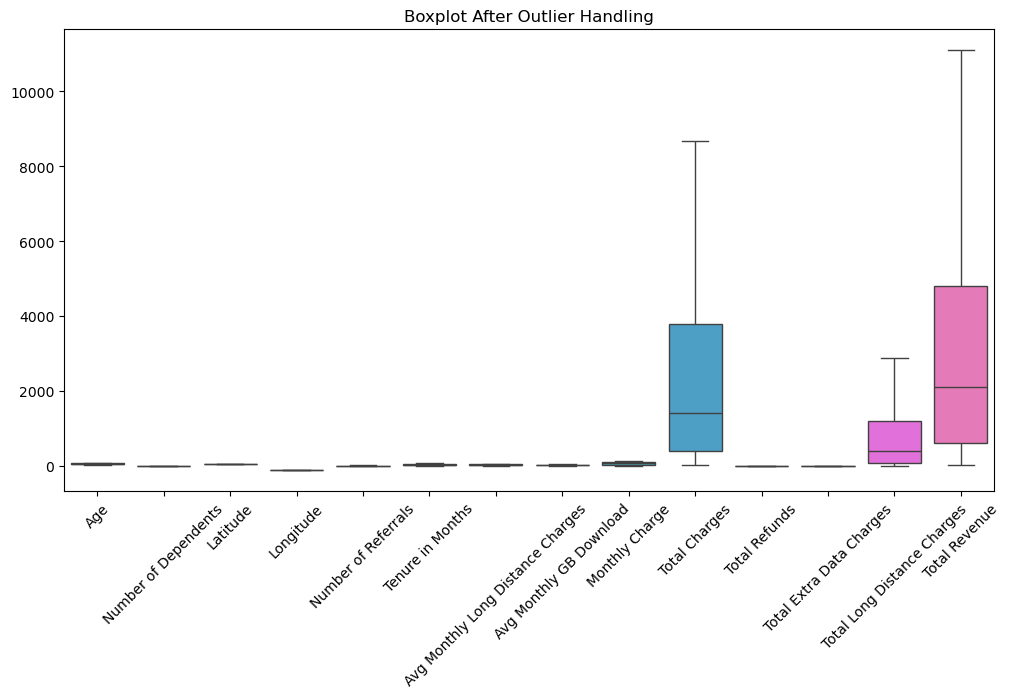

In [18]:
#Plotting Box Plot after Oulier Removal
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols])
plt.title("Boxplot After Outlier Handling")
plt.xticks(rotation=45)
plt.show()


In [19]:
df_feat = df.copy()#Making a copy of original dataset so that original #dataset do not get hampered

In [20]:
df['AvgMonthlySpend'] = df['Total Charges'] / df['Tenure in Months']#Calculating Avg Monthly Spend and adding that new column in the dataset
df['AvgMonthlySpend'] = df['AvgMonthlySpend'].fillna(0)
#If any customer has Tenure = 0 (newly joined) or missing data,
#the division gives NaN (not a number).
#.fillna(0) replaces those missing or infinite values with 0
#so the column stays clean and numeric.

In [21]:
service_cols = ['Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security',
                'Online Backup', 'Device Protection Plan', 'Premium Tech Support',
                'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data']
df['TotalServices'] = (df[service_cols] == 'Yes').sum(axis=1)
#(df[service_cols] == 'Yes')
#This checks, for each row, which of those service columns are marked “Yes”.
#It returns a DataFrame of True/False values, for example:
#| Phone Service | Internet Service | Streaming TV | ... |
#|----------------|------------------|---------------|
#| True | True | False |
#| True | False | False |
#| False | True | True |

#.sum(axis=1)
#In Python, True = 1 and False = 0.
#So, summing across each row (axis=1) counts how many “Yes” values there are.

In [22]:
df['AvgRevenuePerMonth'] = df['Total Revenue'] / df['Tenure in Months']
df['AvgRevenuePerMonth'] = df['AvgRevenuePerMonth'].fillna(0)

In [23]:
df

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,AvgMonthlySpend,TotalServices,AvgRevenuePerMonth
0,0002-ORFBO,Female,37.0,Yes,0.0,Frazier Park,93225,34.827662,-118.999073,2.0,...,0.0,0.0,381.51,974.81,Stayed,Competitor,Competitor had better devices,65.922222,6,108.312222
1,0003-MKNFE,Male,46.0,No,0.0,Glendale,91206,34.162515,-118.203869,0.0,...,0.0,0.0,96.21,610.28,Stayed,Competitor,Competitor had better devices,60.266667,5,67.808889
2,0004-TLHLJ,Male,50.0,No,0.0,Costa Mesa,92627,33.645672,-117.922613,0.0,...,0.0,0.0,134.60,415.45,Churned,Competitor,Competitor had better devices,70.212500,4,103.862500
3,0011-IGKFF,Male,78.0,Yes,0.0,Martinez,94553,38.014457,-122.115432,1.0,...,0.0,0.0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction,95.219231,7,123.039231
4,0013-EXCHZ,Female,75.0,Yes,0.0,Camarillo,93010,34.227846,-119.079903,3.0,...,0.0,0.0,22.14,289.54,Churned,Dissatisfaction,Network reliability,89.133333,5,96.513333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,20.0,No,0.0,La Mesa,91941,32.759327,-116.997260,0.0,...,0.0,0.0,606.84,1349.74,Stayed,Competitor,Competitor had better devices,57.146154,6,103.826154
7039,9992-RRAMN,Male,40.0,Yes,0.0,Riverbank,95367,37.734971,-120.954271,1.0,...,0.0,0.0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction,85.168182,6,101.368182
7040,9992-UJOEL,Male,22.0,No,0.0,Elk,95432,39.108252,-123.645121,0.0,...,0.0,0.0,37.24,129.99,Joined,Competitor,Competitor had better devices,46.375000,4,64.995000
7041,9993-LHIEB,Male,21.0,Yes,0.0,Solana Beach,92075,33.001813,-117.263628,5.0,...,0.0,0.0,142.04,4769.69,Stayed,Competitor,Competitor had better devices,69.069403,8,71.189403


In [24]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns#selecting all numerical columns from the dataset for scaling 

In [25]:
df_unscaled = df.copy()#making copy of unscaled data

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
#Applying Standard Scaling

#Standardization is also called as Z-Score Normalization whose formula is 
#z score/X dash=(x−μ)/σ
#where x is the value in that particular column and μ is the mean of that particular column and σ is standard
#deviation of that particular column.You can see the mean and standard deviation for every column from
#the df.describe() command used above in the code

#Due to Standard Scaler every column of our dataset will now have the mean=0 and standard deviation as 1

In [27]:
df[num_cols].head()#Printing Scaled dataset

,Age,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,AvgMonthlySpend,TotalServices,AvgRevenuePerMonth
0,-0.567773,0.0,-0.554852,0.351678,0.072945,-0.952994,1.257532,-0.644074,0.064221,-0.744500,0.0,0.0,-0.436333,-0.719294,0.038403,0.233871,0.563224
1,-0.030433,0.0,-0.824278,0.720807,-0.678700,-0.952994,-1.091613,-1.142999,-2.166367,-0.766962,0.0,0.0,-0.782748,-0.846672,-0.148943,-0.149455,-0.565686
2,0.208385,0.0,-1.033632,0.851364,-0.678700,-1.156740,0.609850,0.520084,0.330225,-0.882382,0.0,0.0,-0.736134,-0.914752,0.180524,-0.532782,0.439202
3,1.880110,0.0,0.736000,-1.094917,-0.302878,-0.789997,0.177815,-1.641923,1.102599,-0.460063,0.0,0.0,-0.460435,-0.501003,1.008900,0.617198,0.973696
4,1.700997,0.0,-0.797815,0.314157,0.448767,-1.197489,-1.336902,-1.059844,0.650712,-0.888318,0.0,0.0,-0.872685,-0.958749,0.807298,-0.149455,0.234365


In [28]:
from sklearn.model_selection import train_test_split#Splitting dataset into  testing and training
X = df.drop('Customer Status', axis=1)#removing Customer_Status column from dataset as it would be our target column
#and others will be input columns(X)
y = df['Customer Status']
#Customer_Status column has values liked Stayed Churned or Joined thats what we want to predict thats 
#why its our target column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
##So we are dividing their values into training and testing 80% of data is training
#test_size=0.2 denotes 20% of data wil be testing dataset
#random state ensures that whenever we run the program every time the same values of the data are taken for training 
#and testing means suppose we have 100 records in our data out of which we are using 80  for training and 20 for testing
#so every time the same 80 values will be in training and same 20 values will be in testing means not a single record of 
#training data will go in the testing data and not single value of testing data will come in training data means there will
#be no shuffling of records the same data will be used for training and testing every time we run the program this is 
#the use of random state

#In random_state=42  42 is just a normal number there is no role of zero we have to just write it when we are using 
#random_state  we can use any other number other than zero as well like 1,4,10 etc.42 is the most common number you see
#in programs

In [29]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (5634, 40)
X_test shape: (1409, 40)
y_train shape: (5634,)
y_test shape: (1409,)


In [30]:
df.to_csv("Cleaned_Telecom_Customer_Churn.csv", index=False)

print("✅ Cleaned dataset exported successfully!")

✅ Cleaned dataset exported successfully!


In [31]:

# Export it
df_unscaled.to_csv("Cleaned_Telecom_Customer_Churn_Unscaled.csv", index=False)

print("✅ Cleaned dataset (without scaling) exported successfully!")


✅ Cleaned dataset (without scaling) exported successfully!
